# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

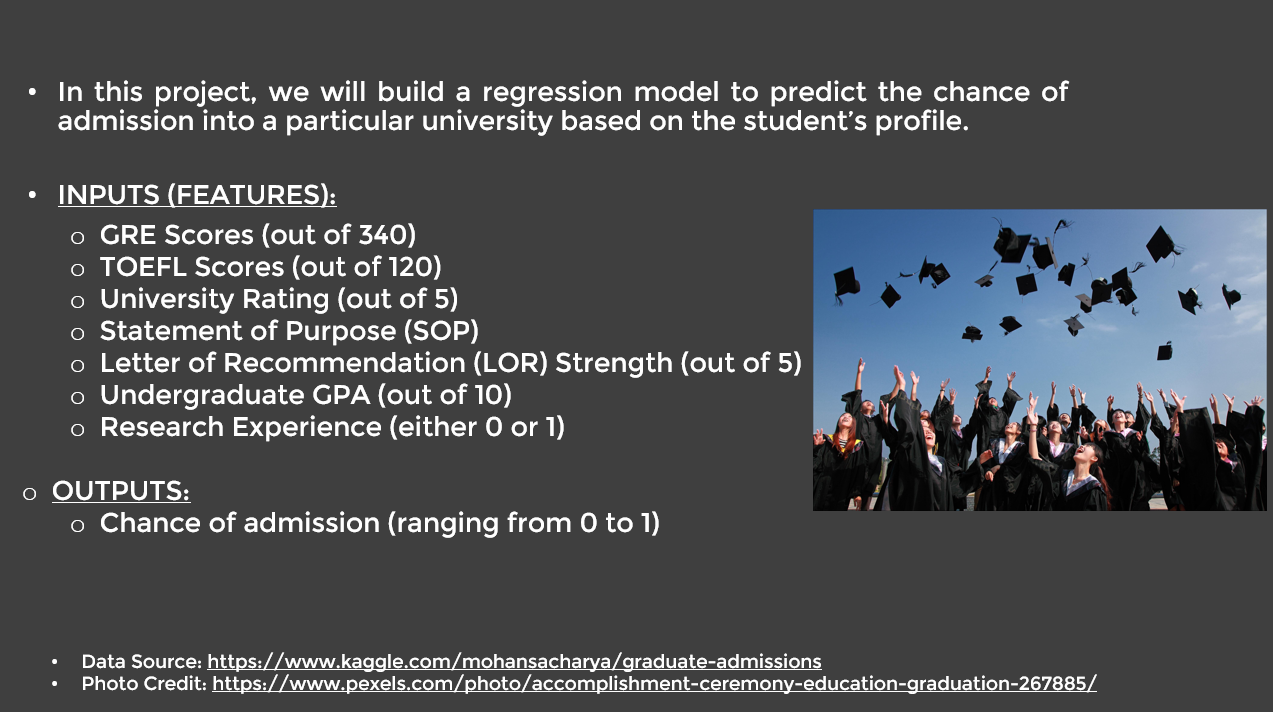

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

ModuleNotFoundError: No module named 'jupyterthemes'

In [3]:
admission_df = pd.read_csv("Admission_Predict.csv")


In [4]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# Let's drop the serial no.
admission_df =admission_df.drop("Serial No.", axis=1)

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [8]:
# checking the null values
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
# Check the dataframe information
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
# Statistical summary of the dataframe
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [11]:
# Grouping by University ranking 
df_university = admission_df.groupby(by='University Rating').mean()

# TASK #4: PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>, <AxesSubplot:>]],
      dtype=object)

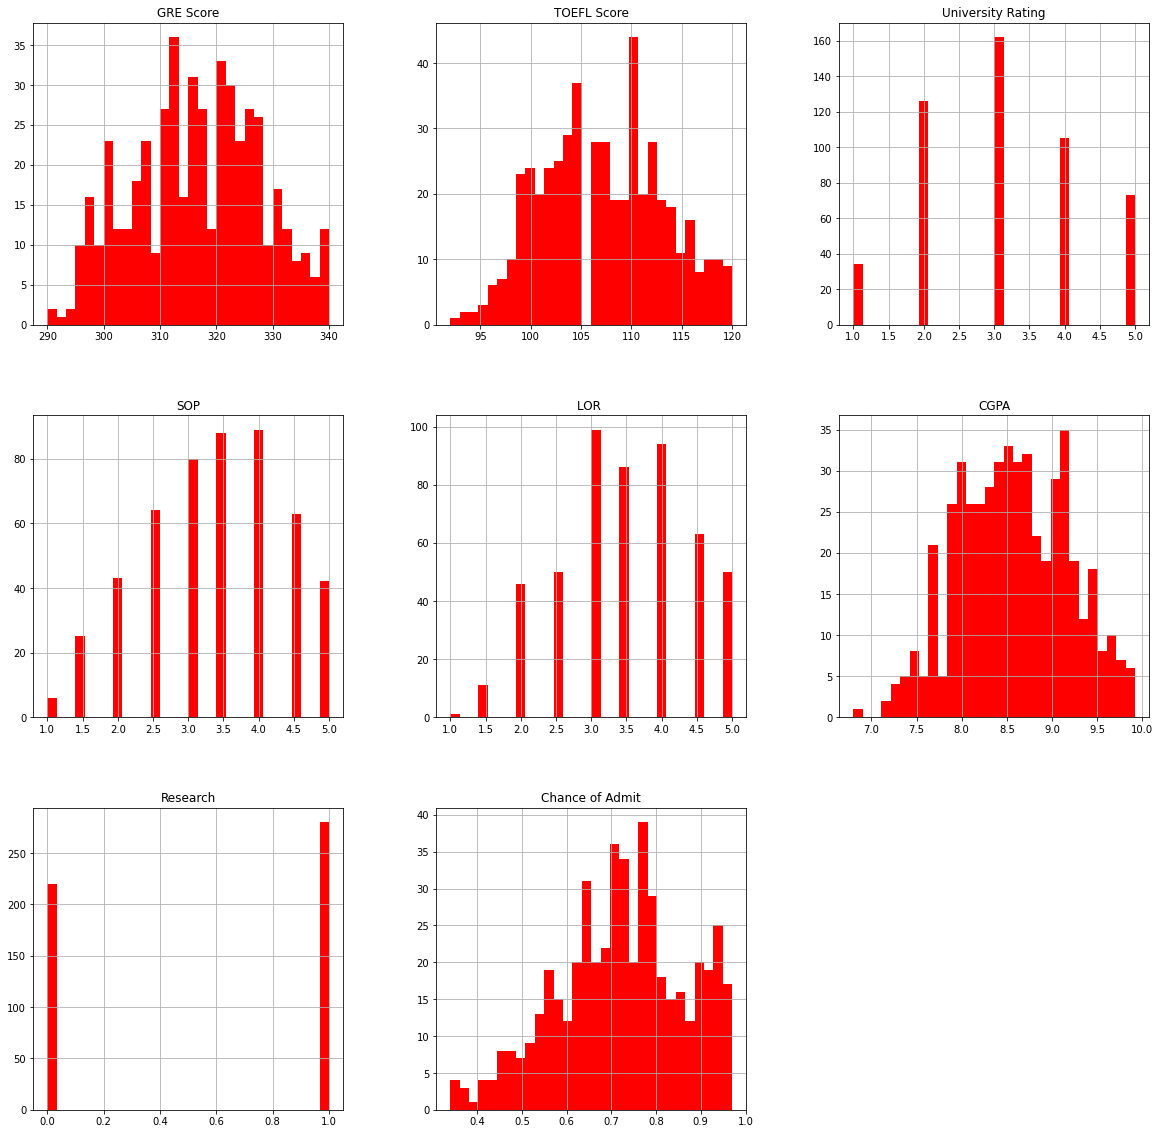

In [12]:
admission_df.hist(bins=30, figsize=(20,20), color='r')

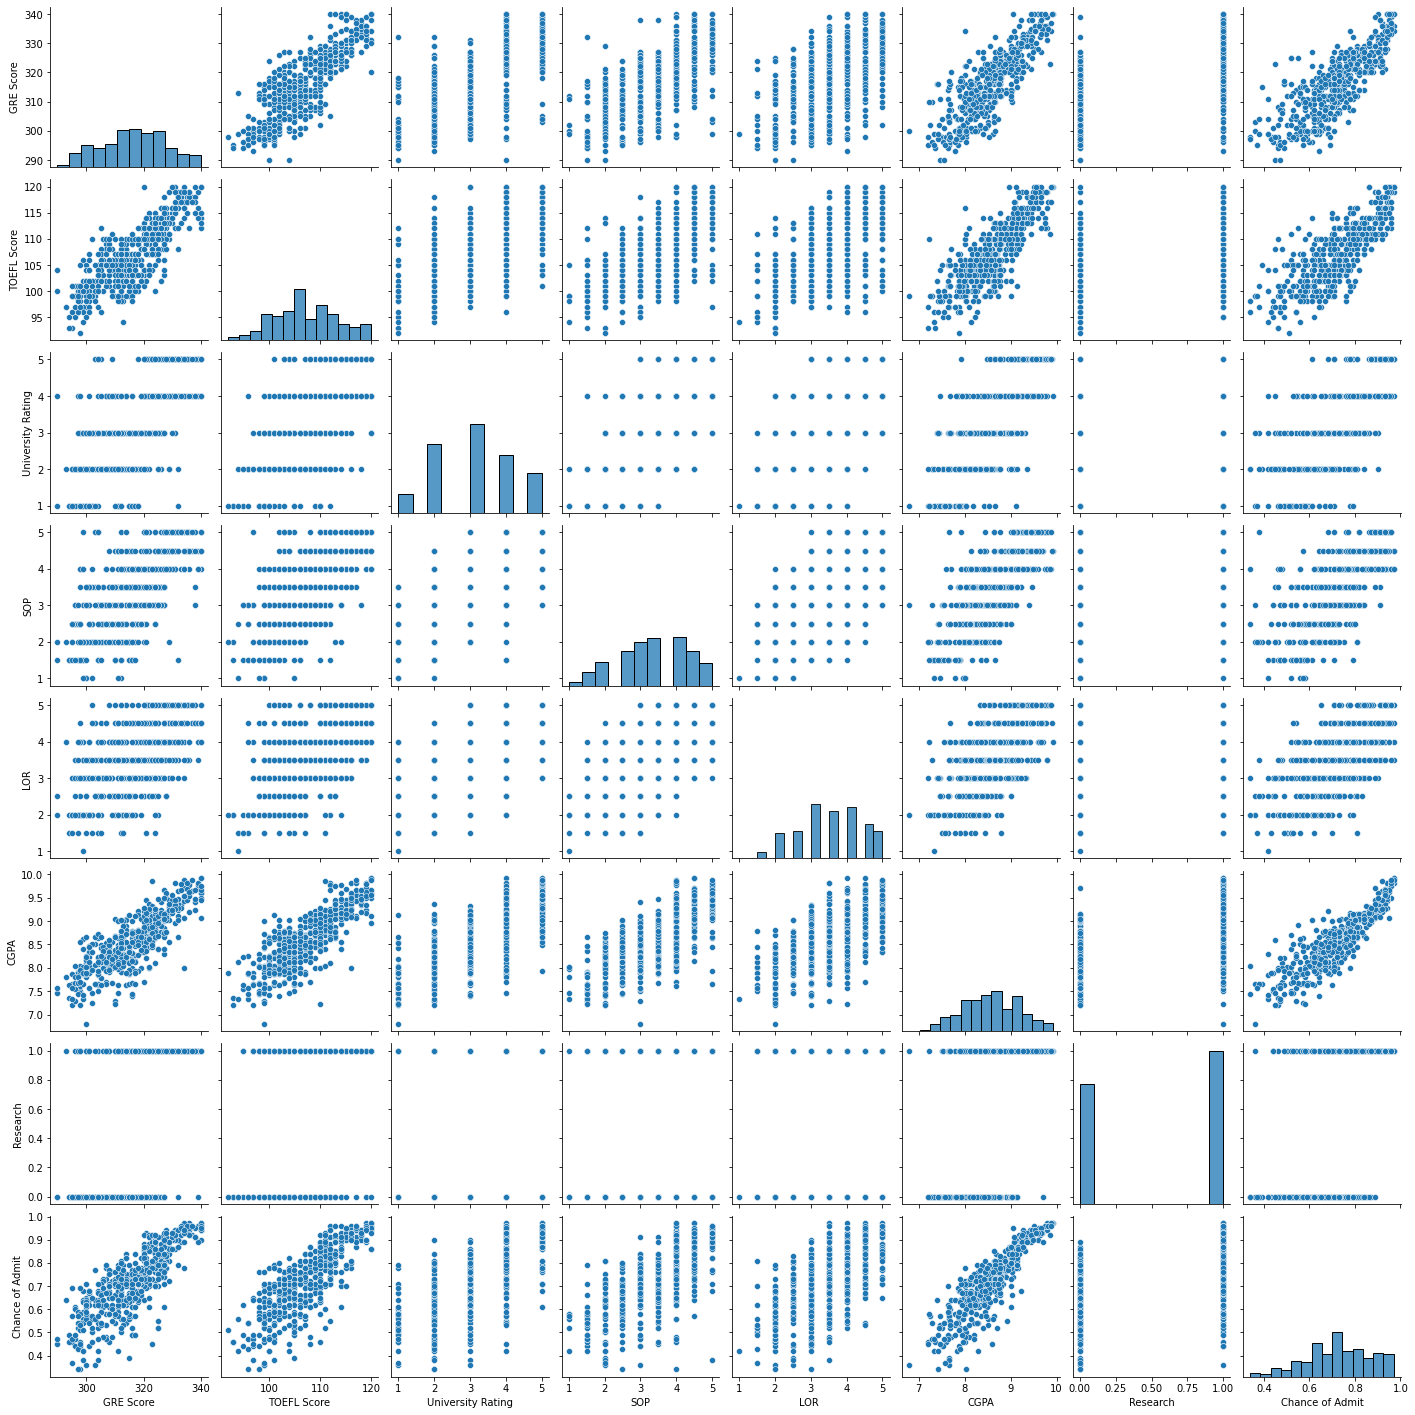

In [13]:
sns.pairplot(admission_df)

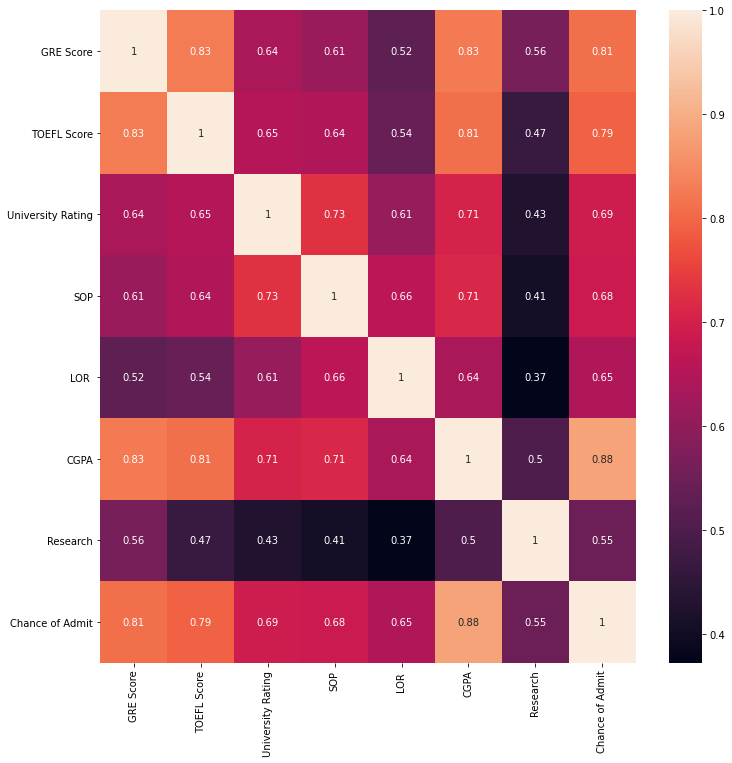

In [14]:
corr_matrix = admission_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()
  

# TASK #5: CREATE TRAINING AND TESTING DATASET

In [15]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [17]:
X = admission_df.drop('Chance of Admit', axis=1)

In [18]:
y=admission_df['Chance of Admit']

In [19]:
X.shape

(500, 7)

In [20]:
y.shape

(500,)

In [21]:
X=np.array(X)
y=np.array(y)

In [22]:
y=y.reshape(-1,1)
y.shape

(500, 1)

In [23]:
# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [24]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [25]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [34]:
LR = LinearRegression()
LR2 = LR.fit(X_train, y_train)
accuracy_scorevalue = LR2.score(X_test, y_test)
print(accuracy_scorevalue)
y2 = LR2.predict(X_test)
mean_squared_error(y2,y_test)

0.8633916816977866


0.14385723235269943

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [39]:
pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached grpcio-1.57.0-cp39-cp39-win_amd64.whl (4.3 MB)
  Using cached h5py-3.9.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.24.1-cp39-cp39-win_amd64.whl (430 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached google_auth-2.22.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using ca

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [41]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [42]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [43]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 12ms/step - loss: 0.6059 - val_loss: 0.2828
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3820 - val_loss: 0.2068
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3212 - val_loss: 0.1960
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.3219 - val_loss: 0.1848
Epoch 5/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2975 - val_loss: 0.1862
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2644 - val_loss: 0.1820
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2832 - val_loss: 0.1856
Epoch 8/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2426 - val_loss: 0.1787
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2626 - val_loss: 0.2174
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2602 - val_loss: 0.1745
Epoch 11

17/17 [==============================] - 0s 4ms/step - loss: 0.1294 - val_loss: 0.2135
Epoch 84/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1383 - val_loss: 0.2075
Epoch 85/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1349 - val_loss: 0.2263
Epoch 86/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1359 - val_loss: 0.2223
Epoch 87/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1123 - val_loss: 0.2171
Epoch 88/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1204 - val_loss: 0.2400
Epoch 89/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1464 - val_loss: 0.2007
Epoch 90/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1263 - val_loss: 0.2091
Epoch 91/100
17/17 [==============================] - 0s 4ms/step - loss: 0.1264 - val_loss: 0.2213
Epoch 92/100
17/17 [==============================] - 0s 3ms/step - loss: 0.1273 - val_loss: 0.2283
Epoch 93/100


In [44]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 3ms/step - loss: 0.2406
Accuracy : 0.7593572437763214


In [45]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

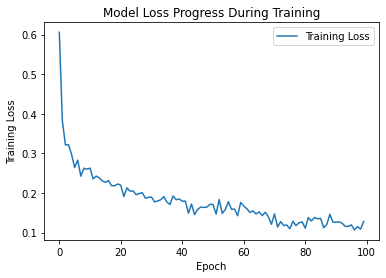

In [46]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [47]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
from sklearn.tree import DecisionTreeRegressor
Decisiontree_model = DecisionTreeRegressor()
Decisiontree_model.fit(X_train, y_train)




DecisionTreeRegressor()

In [48]:
accuracy_decisiontree = Decisiontree_model.score(X_test, y_test)
accuracy_decisiontree

0.6208074834795871

In [52]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
RandomForest_model.fit(X_train, y_train)


<ipython-input-52-3da77294b80a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

In [53]:
accuracy_randomForest = RandomForest_model.score(X_test, y_test)
accuracy_randomForest

0.8401439618500849

# TASK #9: CALCULATE REGRESSION MODEL KPIs

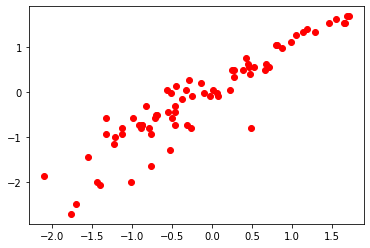

In [57]:
y_predict = LR.predict(X_test)
plt.plot(y_predict, y_test, 'o', color='red')

In [58]:
y_predict_original = scaler_y.inverse_transform(y_predict)
y_test_original= scaler_y.inverse_transform(y_test)


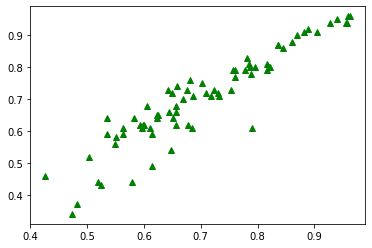

In [60]:
plt.plot(y_predict_original,y_test_original, '^',color='green' )

In [61]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [63]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)),'.3f'))
MSE = mean_squared_error(y_test_original, y_predict_original)
MAE = mean_absolute_error(y_test_original, y_predict_original)
r2 = r2_score(y_test_original, y_predict_original)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.053 
MSE = 0.0028599928944979345 
MAE = 0.03862592089006205 
R2 = 0.8633916816977866 
Adjusted R2 = 0.8491191708303911
